# Wine Classification

This notebook aims to compare different classification models for the problem of wine classification.

**Dataset**: [Modification](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html) of UCI ML Wine Data Set dataset. Some informations:
* classes: 3
* samples per class: [class_0 = 59, class_1 = 71, class_2 = 48]
* samples total: 178
* dimensions: 13
* features: real, positive

# Importing libraries

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
from sklearn.datasets import load_wine

# Training/Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [260]:
CMAP = sns.color_palette("rocket", as_cmap=True)

## Importing the dataset

In [261]:
dataset = load_wine(as_frame=True)
features, target = dataset.data, dataset.target
class_names = dataset.target_names

## Explorating the dataset

What are the classes included on the dataset?

In [262]:
print(f"Classes = {class_names}")

Classes = ['class_0' 'class_1' 'class_2']


Correlation between the features

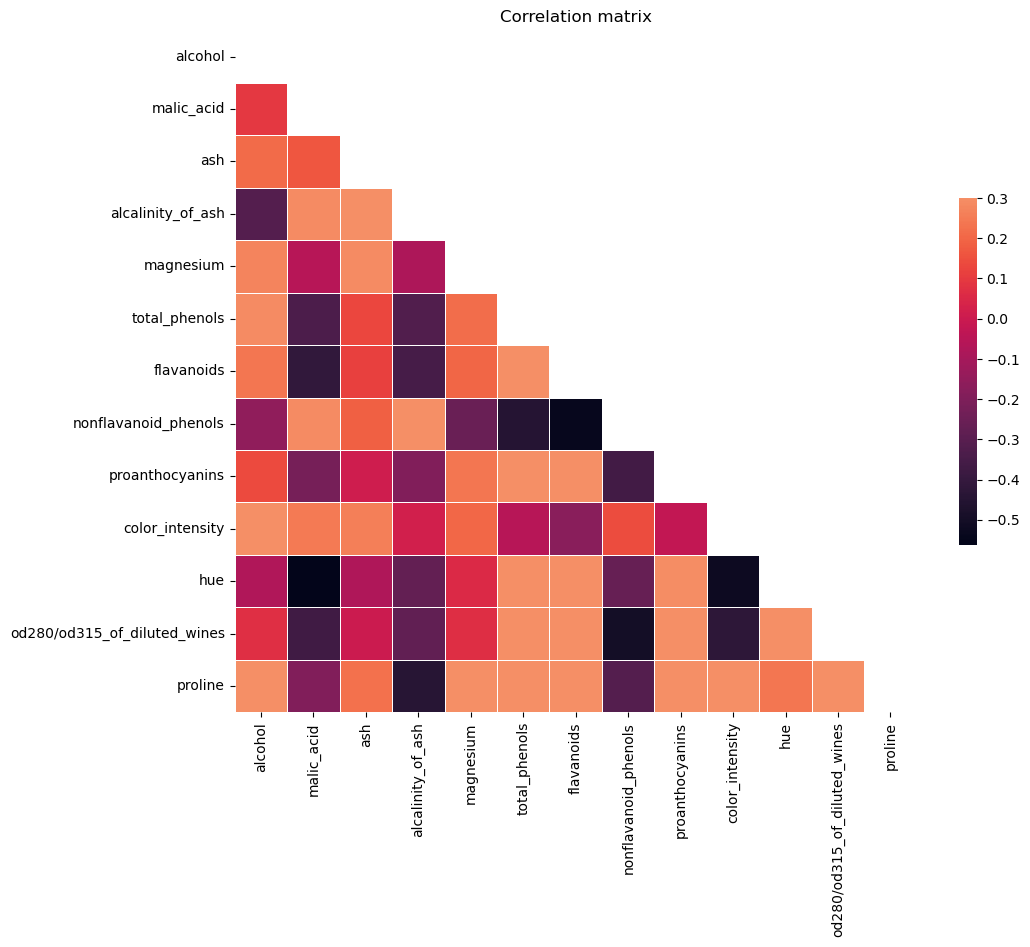

In [263]:
correlations = features.corr(method="pearson")
mask = np.triu(np.ones_like(correlations, dtype=bool))
figure, axes = plt.subplots(figsize=(11, 9))

plt.title("Correlation matrix")
sns.heatmap(correlations, mask=mask, cmap=CMAP, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Preprocessing the dataset

In [264]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [265]:
X = features.copy()
y = target.copy()
X.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [266]:
X_stand = StandardScaler().fit_transform(X)
X_stand[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [267]:
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                            y, 
                                                            train_size=0.8,
                                                            stratify=y, 
                                                            shuffle=True)

print(f"Total: {len(X)} examples")
print(f"==== Details ====")
print(f"Train: {len(x_train)} examples")
print(f"Test: {len(x_test)} examples")

Total: 178 examples
==== Details ====
Train: 142 examples
Test: 36 examples


## Training

In [268]:
def train_classification_model(model, x_train, y_train):
    model.fit(x_train, y_train)

experiments_svm = [
    {
        'title': 'NuSVC',
        'model': NuSVC()
    },
    {
        'title': 'SVC',
        'model': SVC()
    },
    {
        'title': 'LinearSVC',
        'model': LinearSVC(dual='auto')
    }
]

experiments_knn = [
    {
        'title': 'KNC',
        'model': KNeighborsClassifier(n_neighbors=8),
    }
]

In [269]:
def run_experiments_in_batch(experiments, experiment_title):
    results = []
    for experiment in experiments:
        title = experiment['title']
        model = experiment['model']

        print(f"[LOG] Training model: {title}")

        train_classification_model(model, x_train, y_train)

        # Evaluating the model
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0.0) * 100
        recall = recall_score(y_test, y_pred, average='macro', zero_division=0.0) * 100
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0.0) * 100

        results.append({
            'metrics': (experiment_title, title, accuracy, precision, recall, f1),
            'y_pred': y_pred,
            'model': model
        })
    
    return results

Training with SVM (SVC, NuSVC, LinearSVC)

In [270]:
results_svm = run_experiments_in_batch(experiments_svm, experiment_title="SVM")

[LOG] Training model: NuSVC
[LOG] Training model: SVC
[LOG] Training model: LinearSVC


Training with KNN

In [271]:
results_knn = run_experiments_in_batch(experiments_knn, experiment_title="KNN")

[LOG] Training model: KNC


## Evaluating the experiments

In [272]:
def extract_metrics(item):
    return item['metrics']

all_experiments = results_svm + results_knn
table = PrettyTable(['Experiment', 
                     'Model', 
                     'Accuracy (%)', 
                     'Precision (%)', 
                     'Recall (%)', 
                     'F1 Score (%)'])

data_to_show = list(map(extract_metrics, all_experiments))
table.add_rows(data_to_show)
print(table)

+------------+-----------+--------------------+--------------------+--------------------+-------------------+
| Experiment |   Model   |    Accuracy (%)    |   Precision (%)    |     Recall (%)     |    F1 Score (%)   |
+------------+-----------+--------------------+--------------------+--------------------+-------------------+
|    SVM     |   NuSVC   | 83.33333333333334  | 87.89473684210526  | 81.66666666666667  | 83.00653594771242 |
|    SVM     |    SVC    | 63.888888888888886 | 47.94871794871795  | 58.333333333333336 | 50.60606060606061 |
|    SVM     | LinearSVC | 97.22222222222221  | 96.96969696969697  | 97.61904761904762  | 97.17813051146385 |
|    KNN     |    KNC    | 66.66666666666666  | 62.815126050420176 | 63.57142857142858  | 62.57115749525616 |
+------------+-----------+--------------------+--------------------+--------------------+-------------------+


Confusion Matrix of the best model

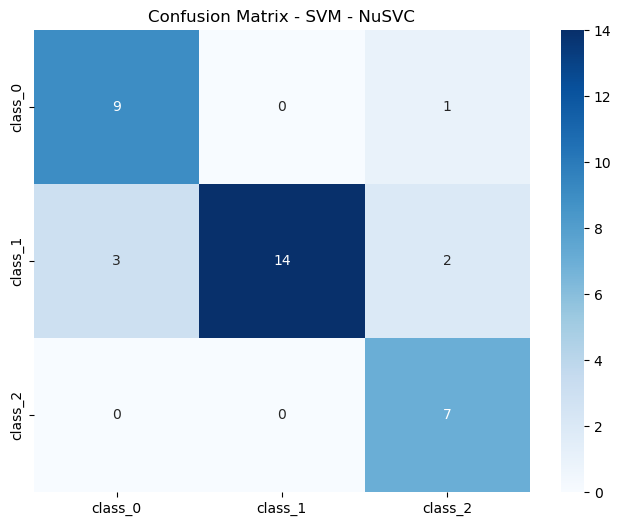

In [280]:
METRIC_INDEX = {
    'accuracy': 2,
    'precision': 3,
    'recall': 4,
    'f1_score': 5,
}

target_metric = 'accuracy'
target_value = None
best_experiment = None
index = 0

for experiment in data_to_show:
    target_index = METRIC_INDEX[target_metric]
    if target_value == None:
        target_value = experiment[target_index]
        best_experiment = index
    elif target_value < experiment[target_index]:
        target_value = experiment[target_index]
        best_experiment = index

    index += 0

best_experiment = all_experiments[best_experiment]
y_pred = best_experiment['y_pred']

plt.figure(figsize=(8,6))
cm = confusion_matrix(y_pred, y_test)
experiment_title = best_experiment['metrics'][0]
model_name = best_experiment['metrics'][1]
plt.title(f'Confusion Matrix - {experiment_title} - {model_name}')
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', yticklabels=class_names, xticklabels=class_names)
plt.show()